# Decision Tree Classifier

A Decision Tree is a flowchart-like structure where an internal node represents a **feature** (or attribute), the branch represents a **decision rule**, and each leaf node represents the **outcome**.

### The Core Idea: Divide and Conquer
The goal is to split the data into groups that are as pure as possible (e.g., all one class).

- **Gini Impurity / Entropy:** Metrics used to calculate "impurity". The algorithm tries to minimize this at every split.
- **Root Node:** The top-most decision node.
- **Leaf Node:** A terminal node that holds the final prediction.

## 1. Visualizing the Decision Process (Iris Dataset)
Decision Trees are "White Box" models, meaning we can see exactly how they make decisions. We'll use the Iris dataset and visualize the tree.

At each step Gini Impurity Reduction is maximised.
Gini Impurity is calculated by :

$$G(S) = 1 - \sum_{i=1}^{k} p_i^2$$

Can also use entropy, in which case we optimise information gain. Entropy is expressed as:

$$H(S) = - \sum_{i=1}^{k} p_i \log_2(p_i)$$


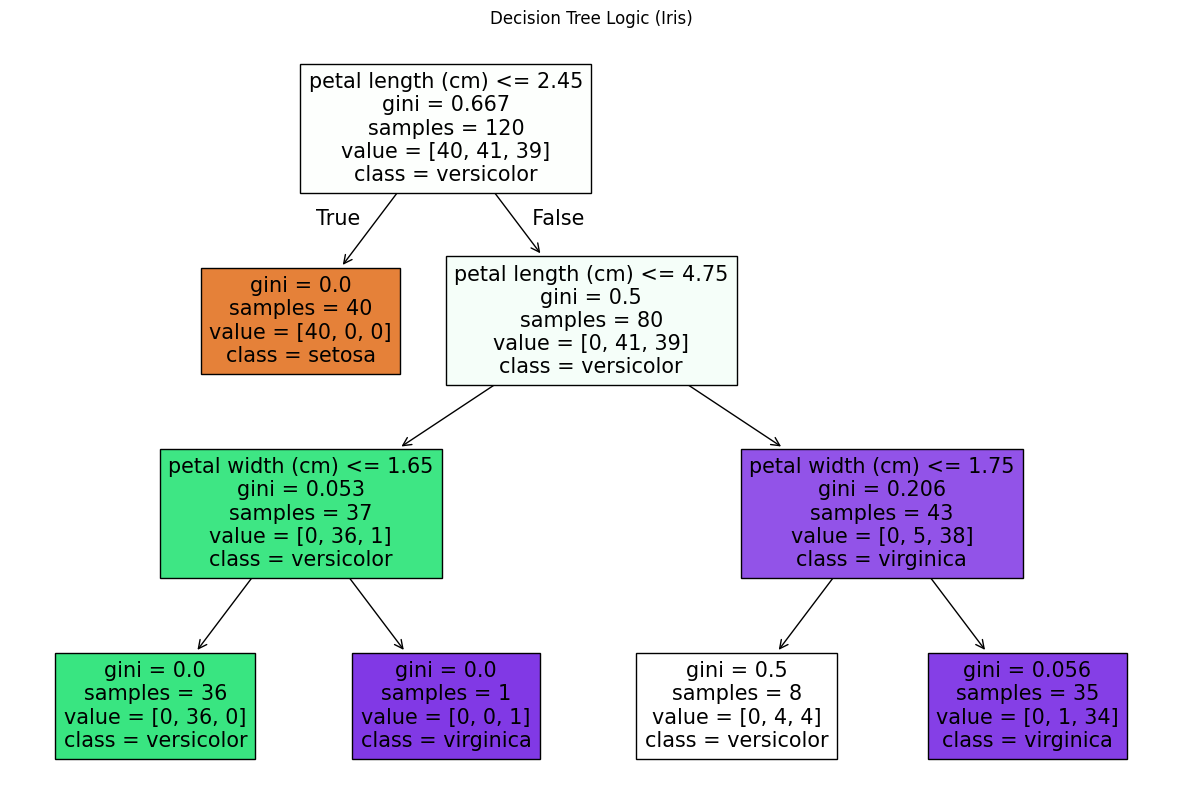

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris
iris = load_iris()
X = iris.data
y = iris.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a small tree (max_depth=3) for visualization purposes
dt_small = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_small.fit(X_train, y_train)

# Visualize
plt.figure(figsize=(15, 10))
plot_tree(dt_small, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Logic (Iris)")
plt.show()

The first rule is chosen because among all features and all thresholds, petal length ≤ 2.45 produces the largest immediate reduction in class impurity.

## 2. The Trap: Overfitting (Loan Prediction Dataset)
Trees naturally want to grow until every single leaf is pure. This often leads to **Overfitting**—the tree memorizes the training data but fails on new data.

We will explore this using a Loan Prediction dataset.

In [2]:
import urllib.request

# Download Loan Prediction Dataset
url = "https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/master/train.csv"
data_path = "loan_data.csv"

if not os.path.exists(data_path):
    urllib.request.urlretrieve(url, data_path)

df_loan = pd.read_csv(data_path)

# Simple Preprocessing (Dropping missing for simplicity)
df_loan = df_loan.dropna()

# Select numeric features and encode simple categorical ones
# (We typically do better preprocessing, but let's focus on the Tree behavior)
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
target = 'Loan_Status'

X_loan = df_loan[features]
y_loan = df_loan[target].map({'Y': 1, 'N': 0})

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_loan, y_loan, test_size=0.2, random_state=42)

print("Loan Data Shape:", X_loan.shape)
df_loan.head()

Loan Data Shape: (480, 5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


### A. The Overfitted Tree
Let's train a tree with **no restrictions** (`max_depth=None`). Watch the difference between Train Accuracy and Test Accuracy.

In [3]:
# Unrestricted Tree
dt_overfit = DecisionTreeClassifier(random_state=42)
dt_overfit.fit(X_train_l, y_train_l)

print(f"Training Accuracy: {accuracy_score(y_train_l, dt_overfit.predict(X_train_l)):.4f} (Memorized!)")
print(f"Test Accuracy:     {accuracy_score(y_test_l, dt_overfit.predict(X_test_l)):.4f} (Lesser than General!)")
print(f"Tree Depth: {dt_overfit.get_depth()}")

Training Accuracy: 1.0000 (Memorized!)
Test Accuracy:     0.7292 (Lesser than General!)
Tree Depth: 22


### B. Pruning (Regularization)
By limiting the `max_depth`, we force the tree to learn simpler, more general patterns.

Training Accuracy: 0.8229
Test Accuracy:     0.8021 (Better!)


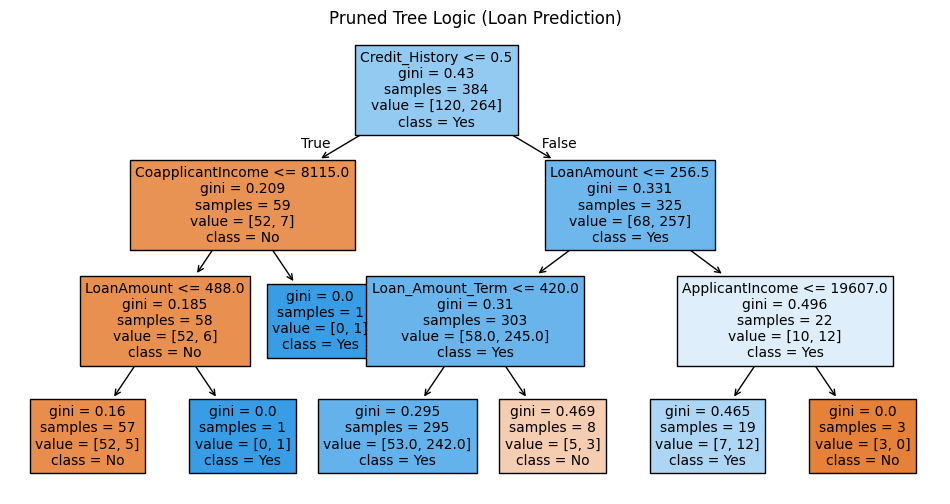

In [4]:
# Pruned Tree
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train_l, y_train_l)

print(f"Training Accuracy: {accuracy_score(y_train_l, dt_pruned.predict(X_train_l)):.4f}")
print(f"Test Accuracy:     {accuracy_score(y_test_l, dt_pruned.predict(X_test_l)):.4f} (Better!)")

# Why? Because it ignores noise and captures the main rules (like Credit History)
plt.figure(figsize=(12, 6))
plot_tree(dt_pruned, feature_names=features, class_names=['No', 'Yes'], filled=True, fontsize=10)
plt.title("Pruned Tree Logic (Loan Prediction)")
plt.show()